In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
df_copy = df.copy()
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [5]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

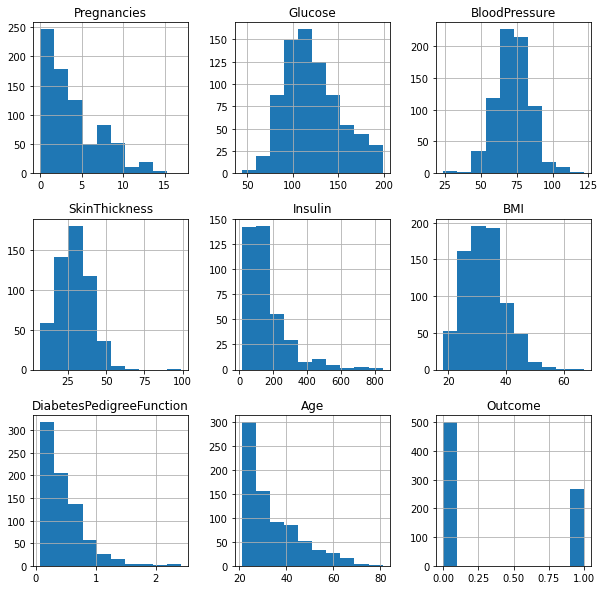

In [6]:
df_copy.hist(figsize=(10,10))

In [7]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)

In [8]:
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)

In [9]:
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)


In [10]:
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)


In [11]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

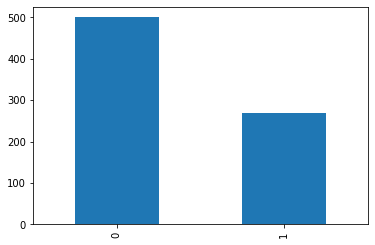

In [12]:
df['Outcome'].value_counts().plot(kind='bar')

array([[<AxesSubplot: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot: xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot: xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot: xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot: xlabel='Age', ylabel='Pregnancies'>,
        <AxesSubplot: xlabel='Outcome', ylabel='Pregnancies'>],
       [<AxesSubplot: xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot: xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot: xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot: xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot: xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot: xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot: xlabel='DiabetesPed

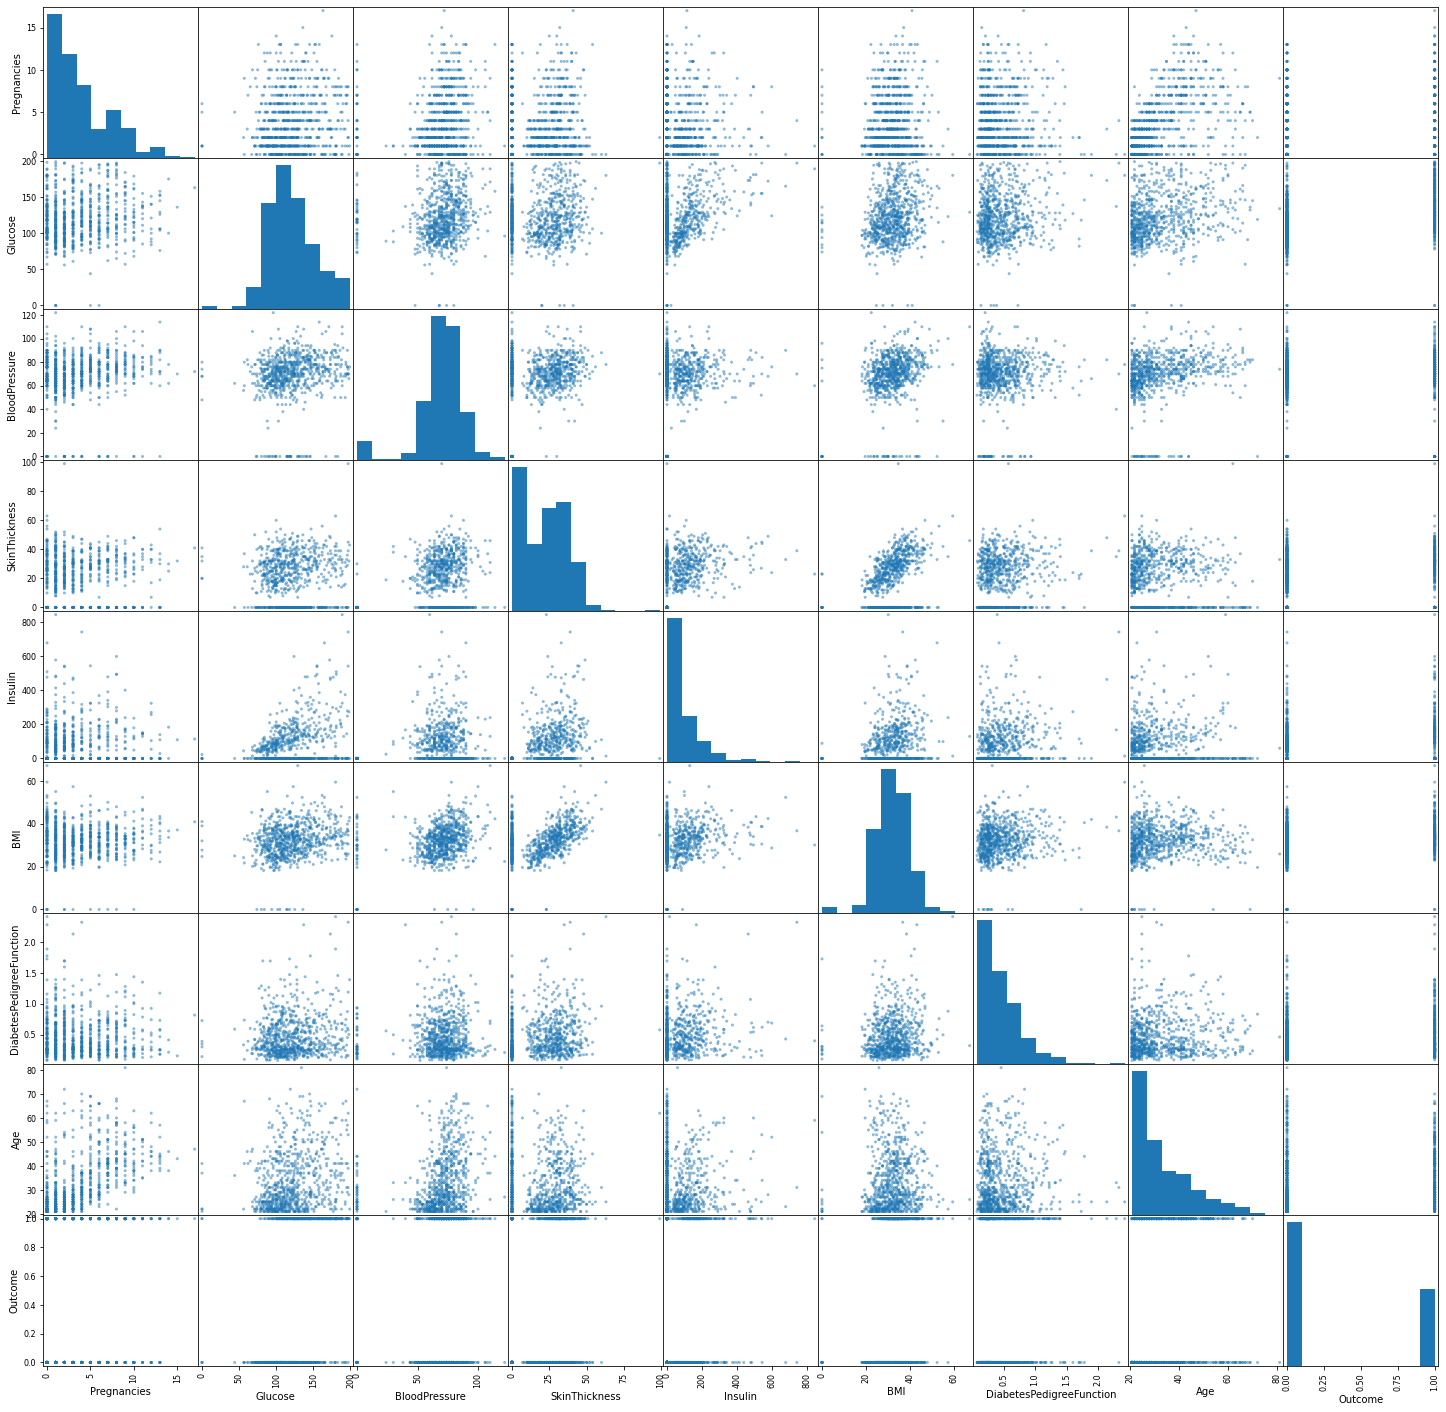

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize = (25,25))

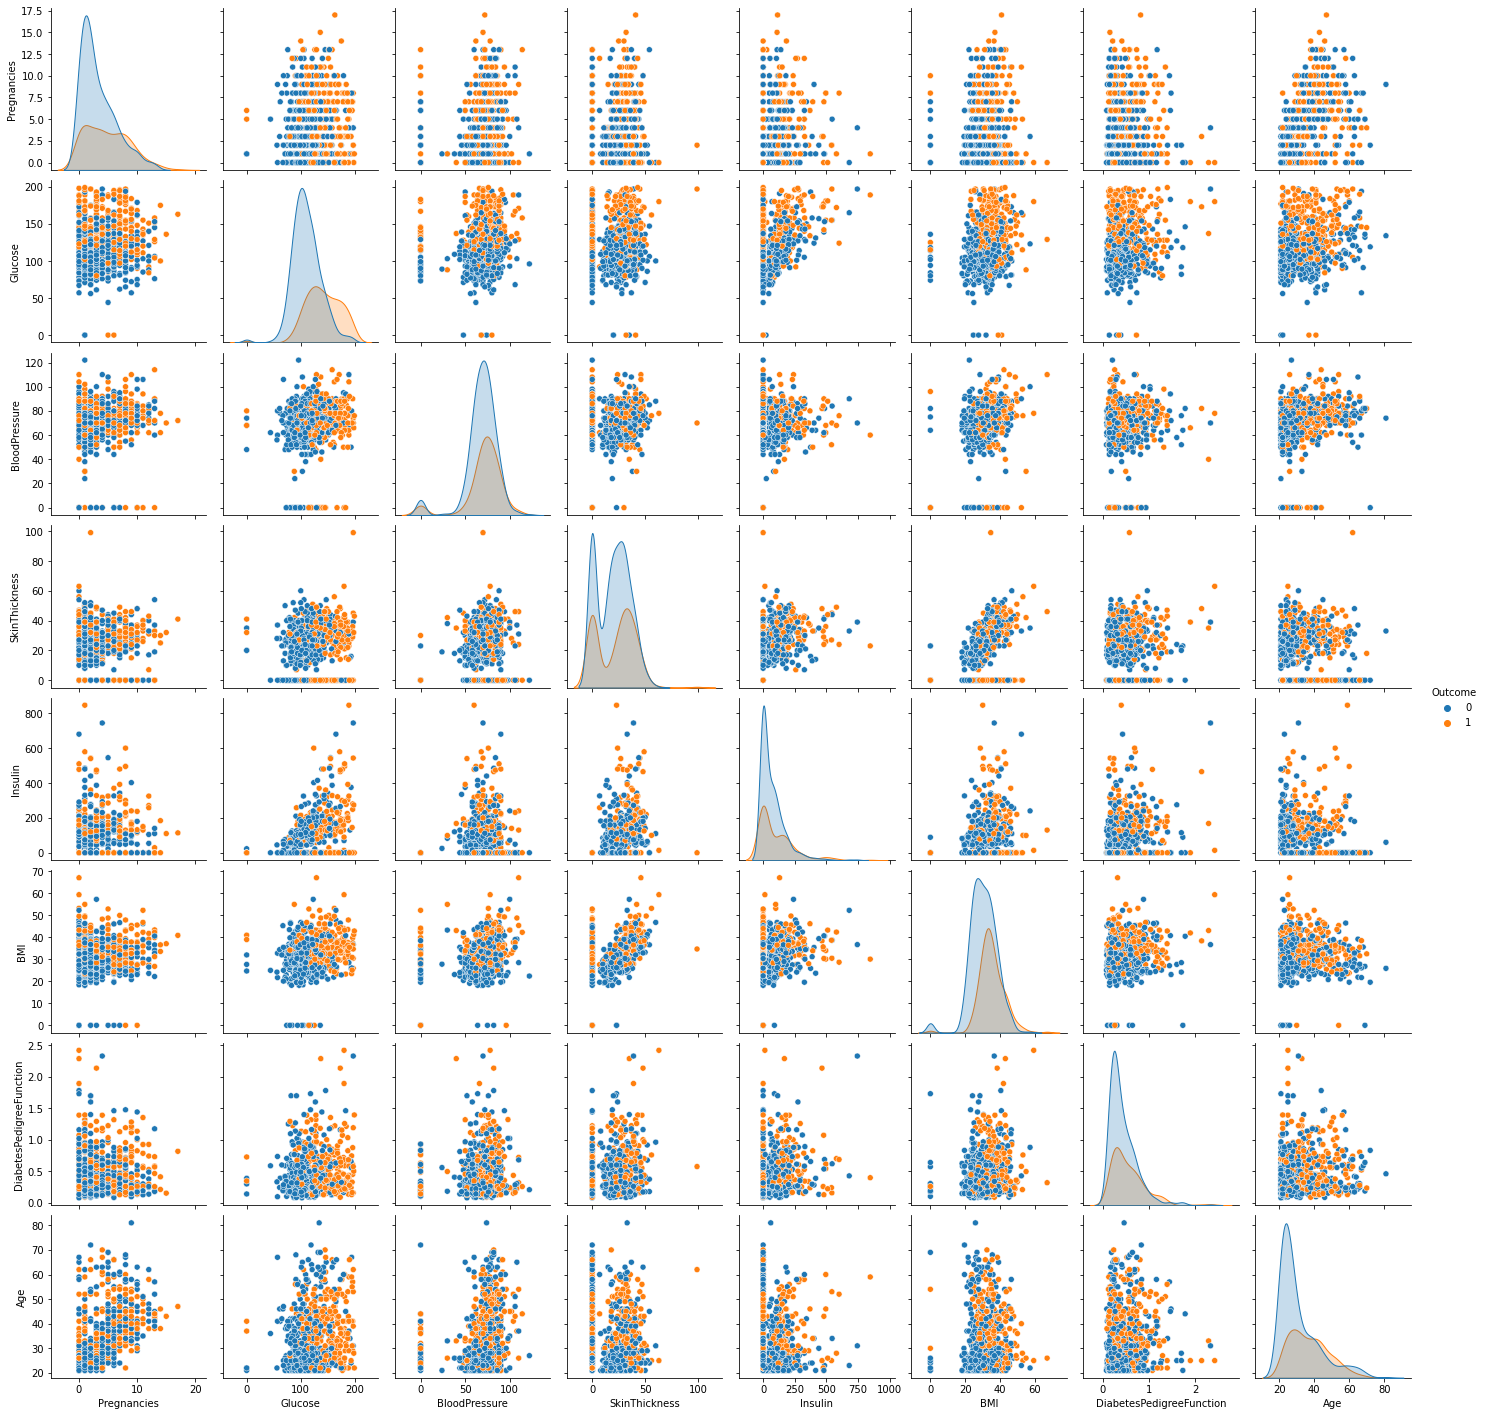

In [14]:
sns.pairplot(df,hue='Outcome')

<AxesSubplot: >

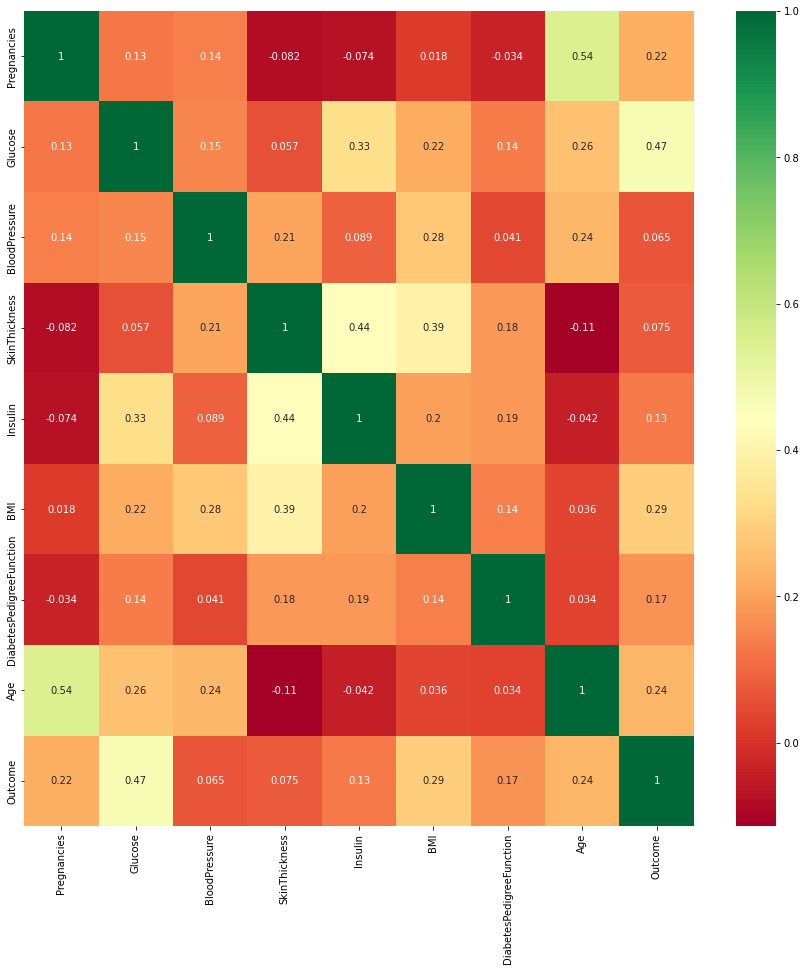

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

<AxesSubplot: >

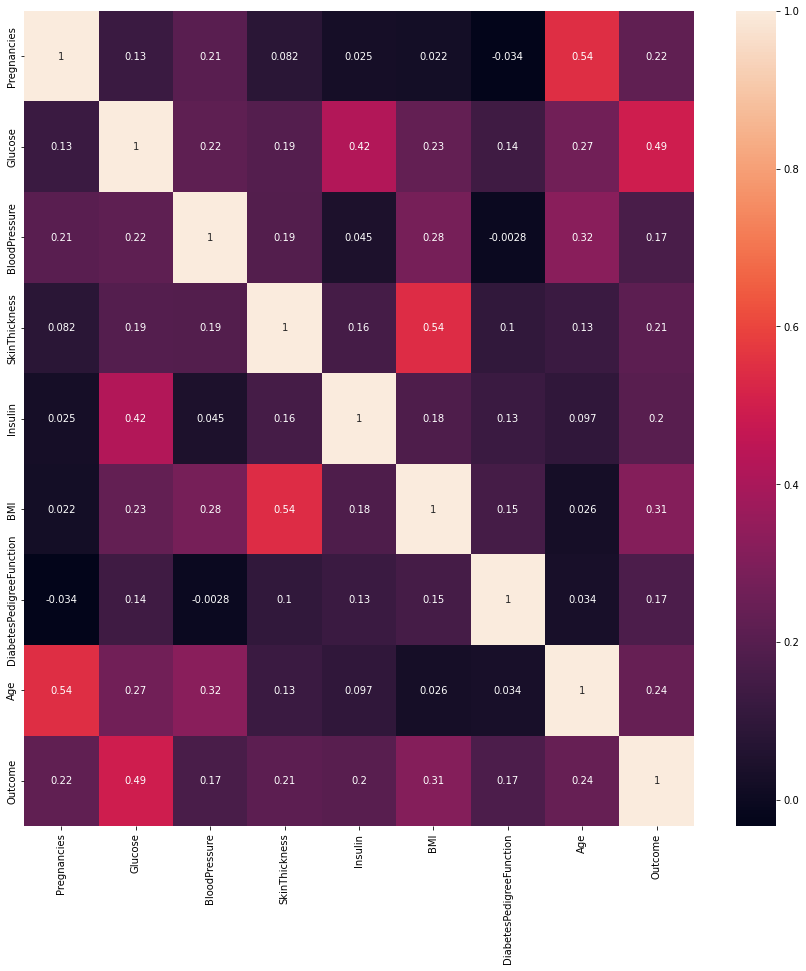

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(), annot = True)

In [17]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [18]:
X = df_copy.drop('Outcome', axis = 1)
y = df_copy['Outcome']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier


In [22]:
models = {
    'knn':{
     'model': KNeighborsClassifier(),
    'params': {
        'n_neighbors' : [10,20,25,30]
    }},
    'svm':{
        'model':  svm.SVC(),
    'params': {
        'C': [1,10,100],
        'kernel': ['rbf','linear','poly','sigmoid'],
        
    }}
}

In [23]:
from sklearn.model_selection import GridSearchCV

results = []

for model_name,m in models.items():
    clf = GridSearchCV(m['model'],m['params'], cv=5)
    clf.fit(X_train,y_train)
    results.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_
    })
    


In [24]:
best_clf = pd.DataFrame(results, columns=['model','best_score','best_params'])

In [25]:
best_clf

,model,best_score,best_params
0,knn,0.776796,{'n_neighbors': 25}
1,svm,0.762148,"{'C': 1, 'kernel': 'linear'}"


In [35]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [36]:
accuracy_score(y_test, knn.predict(X_test))

0.7207792207792207

In [37]:
y_pred = knn.predict(X_test)

<AxesSubplot: >

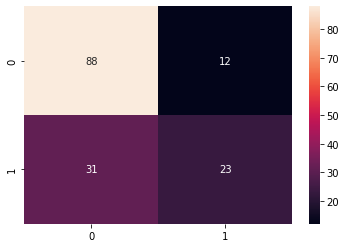

In [38]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True)


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154

